# 알파 채널이 추가된 png 파일 만들기

* 편집하려는 이미지의 경로를 직접 입력받는다.
    * 옳은 경로를 입력할 때까지 반복한다.

* 실행할 기능에 대한 버튼을 키보드로부터 입력받는다.
    * 1: 역투영
    * 2: 쓰레시 홀드
        * 이진영상 모폴로지 연산??
    * 3: 마스킹
    * 4: roi 영역 선택
    * s: 저장
    * ESC, q: 종료
    
* 

In [4]:
# 쓰레시홀드 트랙바 콜백함수
def for_threshold_trackbar(x):
    pass

import cv2
import numpy as np

# 해당 경로에 이미지가 존재할 때 까지 반복
while True:
    img_file = 'img/s4.jpg' # input("이미지 경로 :") # 이미지 경로 예시
    img = cv2.imread(img_file)
    if img is None:
        print("경로에 이미지가 존재하지 않습니다.")
        continue
        
    # 알파 채널이 존재하는 BGRA 형식으로 변환
    img_copy = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2BGRA)
    img_copy[:, :, [3]] = 0 # 알파채널을 전부 0으로 초기화
    break

# 프로세스 수행 반복, 키보드 입력으로 다음 기능을 선택
while True:
    print("1: 역투영\n2: 쓰레시 홀드\n3: 마스킹\n4: roi 영역 선택\ns: 저장\nESC, q: 종료\n")

    cv2.namedWindow('Current IMG')          # Current IMG 이름으로 창 생성
    cv2.imshow('Current IMG', img_copy)
    cv2.moveWindow('Current IMG', 100, 10)  # 창 위치 변경
    
    # 키보드 입력으로 작업 선택 [esc,+,-,1,2,3,i,q,r,s]
    while True:
        key = cv2.waitKey(0) & 0xFF
        print("입력", key, chr(key))
        # ascii code {esc,+,-,1,2,3,i,q,r,s}
        if key in {27,43,45,49,50,51,105,113,114,115}: 
            break
    
    # q, esc - 닫기
    if key == ord('q') or key == ord(''): # to ascii code
        print("key = ", key)
        cv2.destroyWindow('Current IMG')
        break

    # + - 그림 확대
    elif key == ord('+'): # 배율 지정으로 확대, CUBIC
        print("그림 확대")
        img_copy = cv2.resize(img_copy, None, None, 2, 2, interpolation = cv2.INTER_CUBIC)
        
    # - - 그림 축소
    elif key == ord('-'): # 크기 지정으로 축소, AREA
        print("그림 축소")
        img_copy = cv2.resize(img_copy, (int(img_copy.shape[0]*0.5), int(img_copy.shape[1]*0.5)), interpolation = cv2.INTER_AREA)
        
    # i - Current IMG 초기 이미지로 초기화
    elif key == ord('i'):
        print("초기화")
        img_copy = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2BGRA)
        img_copy[:, :, [3]] = 0
        cv2.waitKey(1)
        cv2.destroyAllWindows()

    # s - 저장
    elif key == ord('s'):
        print("저장")
        cv2.destroyWindow('Current IMG')
        cv2.imwrite(img_file[:-3]+"png", img_copy)
            
    # r - roi 영역 선택
    elif key == ord('r'):
        print("roi 영역 선택")
        x,y,w,h = cv2.selectROI(img, False)
        if w and h:
            roi = img[y:y+h, x:x+w] # roi 영역 referencing
            img_copy = roi
            key = cv2.waitKey(0)
            cv2.destroyWindow('ROI selector')
    
    # 1번 - 역투영 방식 선택했을 때
    elif key == ord('1'):
        print("역투영")
        cv2.imshow('Back projection', img_copy)
        cv2.waitKey() 
        cv2.destroyWindow('Back projection')
        
        ###################### 다음에 여기 역투영 방식 이해하고, 내껄로 만들어 구현 ######################
        
        
    # 2번 - 흑백 사진에 대한 쓰레시 홀드를 통한 이분화작업 수행
    elif key == ord('2'):
        print("이진 쓰레시홀드")
        cv2.namedWindow('Binary Threshold') # 창 이름 설정
        cv2.createTrackbar('value', 'Binary Threshold', 0, 255, for_threshold_trackbar) # 0~255 값 트랙바 생성
        cv2.setTrackbarPos('value', 'Binary Threshold', 127)   # 트랙바 초기값 127 설정
        
        img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGRA2GRAY) # 이미지 흑백으로 변환
        img_temp = np.zeros_like(img_copy)                     # 이미지와 같은 크기로 임시 배열 만들기
        flag = cv2.THRESH_BINARY                               # 초기 flag 설정
        
        blockSize = 3       # 블럭 사이즈 초기값 (blockSize % 2 == 1 && blockSize > 1 이어야 함)
        C = 0               # 차감 상수 초기값
        threshold = True   # 쓰레시홀드 전역 / 적응형 선택 변수
        
        # 쓰레시홀드 연산 마칠 때 까지 무한 반복
        while True:
            if threshold: # 전역 쓰레시홀드
                value = cv2.getTrackbarPos('value', 'Binary Threshold')   # 임계값 받아오기
                _, img_binary = cv2.threshold(img_gray, value, 255, flag) # 쓰레시 홀드 
                cv2.imshow('Binary Threshold', img_binary)
                
            else:         # 적응형 쓰레시홀드
                size = cv2.getTrackbarPos('blockSize', 'Binary Threshold2')  # 블럭 사이즈
                if size%2 and size>1:   # blockSize % 2 == 1 && blockSize > 1 조건 불충족 시 오류 발생
                    blockSize = size
                C = cv2.getTrackbarPos('C', 'Binary Threshold2')             # 차감 상수 

                img_binary = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, flag, blockSize, C)
                cv2.imshow('Binary Threshold2', img_binary)

            # non-block 상태로, 입력이 있는지 확인해서 있으면 아래 조건문 검사
            key = cv2.waitKey(1)&0xFF
            print(key)
            if key != 255: # 입력이 있을 경우에만 (불필요한 조건 검사 줄이기)
                # esc, q - 닫기
                if key == 27 or key == 113:
                    break
                
                # s - 저장
                elif key == ord('s'):
                    print("저장")
                    
                    ###################### 저장 알고리즘 구현 필요 ######################
                    ###################### 지금은 그냥 그대로 저장 ######################
                    
                    cv2.imwrite(img_file[:-3]+"png", img_binary)
                    break
                    
                # t - 쓰레시홀드 결과값 반전 토글형식으로 선택
                elif key == ord('t'):
                    if flag == cv2.THRESH_BINARY:
                        flag = cv2.THRESH_BINARY_INV # THRESH_BINARY_INV : 반전된 마스크 이미지
                    else:
                        flag = cv2.THRESH_BINARY # cv2.THRESH_BINARY: 임계값 이상은 value로, 미만은 0으로 지정
                        
                # m - 쓰레시홀드 전역 / 적응형 토글형식으로 선택
                elif key == ord('m'):
                    if threshold:
                        threshold = False
                        cv2.destroyWindow('Binary Threshold')
                        cv2.namedWindow('Binary Threshold2') # 창 이름 설정
                        cv2.createTrackbar('blockSize', 'Binary Threshold2', 0, 255, for_threshold_trackbar) # 트랙바 생성
                        cv2.createTrackbar('C', 'Binary Threshold2', -50, 50, for_threshold_trackbar) # 트랙바 생성
                        cv2.setTrackbarPos('blockSize', 'Binary Threshold2', 0) # 트랙바 초기값 설정
                        cv2.setTrackbarPos('C', 'Binary Threshold2', 0) # 트랙바 초기값 설정
                    else:
                        threshold = True
                        cv2.destroyWindow('Binary Threshold2')
                        cv2.namedWindow('Binary Threshold') # 창 이름 설정
                        cv2.createTrackbar('value', 'Binary Threshold', 0, 255, for_threshold_trackbar) # 트랙바 생성
                        cv2.setTrackbarPos('value', 'Binary Threshold', 127) # 트랙바 초기값 설정
        cv2.destroyWindow('Binary Threshold')
        cv2.destroyWindow('Binary Threshold2')
    
    # 3번 - 마스킹 방식 눌렀을 때
    elif key == ord('3'):
        
        ###################### 누른 부분 색깔 추출 알고리즘 구현 ######################
                
        print("hue masking")
        cv2.imshow('hue masking', img_copy)
        cv2.waitKey()
        cv2.destroyAllWindows()

print("종료합니다.")

1: 역투영
2: 쓰레시 홀드
3: 마스킹
4: roi 영역 선택
s: 저장
ESC, q: 종료

입력 50 2
이진 쓰레시홀드
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
113
1: 역투영
2: 쓰레시 홀드
3: 마스킹
4: roi 영역 선택
s: 저장
ESC, q: 종료

입력 50 2
이진 쓰레시홀드
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


In [4]:
win_name = '트랙바'                                     # 창 이름

img = cv2.imread('../img/blank_500.jpg')
print(img.shape)
img.reshape(500,500,4)
print(img.shape)

cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 ---①
def onChange(x):
    print(x)                                            # 트랙바 새로운 위치 값 --- ②
    # 'R', 'G', 'B' 각 트랙바 위치 값    --- ③
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 --- ④
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성    --- ⑤
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()        

(500, 500, 3)


ValueError: cannot reshape array of size 750000 into shape (500,500,4)

In [1]:
import cv2 as cv  
import numpy as np


def nothing(x):
    pass

cv.namedWindow('binary')
cv.createTrackbar('threshold', 'binary', 0, 255, nothing) 
cv.setTrackbarPos('threshold', 'binary', 127)

img_color = cv.imread('img/t4.png')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)


while(True): 
    low = cv.getTrackbarPos('threshold', 'binary') 

    ret,img_binary = cv.threshold(img_gray, low, 255, cv.THRESH_BINARY_INV) # THRESH_BINARY_INV : 반전된 마스크 이미지
  
    cv.imshow('binary', img_binary)
    
    kernel = np.ones((1,1), np.uint8)
    img_mask = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel) 
    img_mask = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel)

    img_result = cv.bitwise_and(img_mask, img_mask, mask = img_mask)
    contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_NONE) # 컨투어 검출


    cv.drawContours(img_color, contours, 0, (0, 255, 0), 3) # 인덱스0, 초록색
    
    cv.imshow('result', img_result) 
    
    cv.imshow("color", img_color)
    
    if cv.waitKey(1)&0xFF == 27: # esc 누르면 닫음
        break

cv.destroyAllWindows()


cv.waitKey(0)

-1

## ROI 기술 복습

ret = cv2.**selectROI**([win_name,] img [, showCrossHair = True, fromCenter = False])

* win_name: ROI 선택을 진행할 창의 이름, str
* img: ROI 선택을 진행할 이미지, NumPy ndarray
* showCrossHair: 선택 영역 중심에 십자모양 표시 여부
* fromCenter: 마우스 클릭 시작지점을 영역의 중심으로 지정
* ret: 선택한 영역 좌표와 크기(x,y,w,h), 선택을 취소한 경우 모두 0

In [1]:
import cv2
import numpy as np

# 초기 선언
img = None

# 해당 경로에 이미지가 존재할 때 까지 반복
while img is None:
    img_file = input("이미지 경로 :")
    img = cv2.imread(img_file).copy()
    if img is None:
        print("경로에 이미지가 존재하지 않습니다.")

# ROI 영역 선택 및 정보 반환
print('roi1 should be selected')
x,y,w,h = cv2.selectROI(img, False)
if w and h:
    roi = img[y:y+h, x:x+w] # roi 영역 referencing
    
    # ROI 영역에서 다시 ROI 영역 선택
    print('roi2 should be selected')
    x1,y1,w1,h1 = cv2.selectROI(roi, False)
    if w1 and h1:
        roi2 = roi[y1:y1+h1, x1:x1+w1] # roi 영역 referencing
        cv2.destroyAllWindows()
        cv2.imshow('roi2', roi2)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 경로 :../img/jiheon.jpg
roi1 should be selected
roi2 should be selected


## 창 관리 기술 복습
* cv2.namedWindow(title [, option]) : 이름을 갖는 창 열기
    * winname: 창 구분자로 활용될 창 이름
    * flags: 창 옵션
        * cv2.WINDOW_NORMAL: 사용자가 창 크기를 조정할 수 있음, 
        * cv2.WINDOW_AUTOSIZE: 이미지와 동일한 크기로 창 크기를 재조정할 수 없음)
* cv2.moveWindow(winname, x, y) : 원하는 위치로 창 옮기기
    * winname: 위치를 변경할 창 이름
    * x, y: 변경할 위치 (x, y 좌표)
* cv2.resizeWindow(winname, width, hegith) : 창 크기 변경
* cv2.destroyWindow(winname) : 창 닫기
* cv2.destroyAllwindows() : 모든 창 닫기

In [1]:
# 창 관리 (win.py)

import cv2

file_path = 'img/t4.jpg'
img = cv2.imread(file_path)                            # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin', cv2.WINDOW_AUTOSIZE)          # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)              # gray 이름으로 창 생성
cv2.imshow('origin', img)                               # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)                            # gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0)                          # 창 위치 변경
cv2.moveWindow('gray', 0, 0)                            # 창 위치 변경

while True:  
    key = cv2.waitKey(0) & 0xFF                         # 아무키나 누르면
    
    if key == ord('q'): # to ascii code
        break
    else:
        print(key, chr(key))
cv2.resizeWindow('origin', 200, 200)                    # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 200, 200)                      # 창 크기 변경 (변경 됨))

cv2.moveWindow('origin', 100, 100)                      # 창 위치 변경
cv2.moveWindow('gray', 100, 100)                        # 창 위치 변경

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyAllWindows()                                 # 모든 창 닫기

32  
32  
32  
97 a
115 s
100 d
102 f


## 키보드 이벤트 처리 복습


In [1]:
# 상하좌우 키입력
import cv2
img = cv2.imread('img/p2.jpg')
title = 'IMG'
x, y = 100, 100

while True:
    cv2.imshow(title, img) # 이미지 보여주기
    cv2.moveWindow(title, x, y) # 윈도우 창 옮기기
    key = cv2.waitKey(0) & 0xFF
    # 안전장치로 비트엔드 연산. 맨 마지막 값만 넘기는 것?
    print(key, chr(key)) # chr은 해당 값을 알파벳으로 바꿔준다.
    if key == ord('h'): # ord는 아스키 값으로 바꿔준다.
        x-=10
    elif key == ord('j'):
        y-=10
    elif key == ord('k'):
        x+=10
    elif key == ord('l'):
        y+=10
    elif key == ord('q') or key == 27: # q 또는 ESC 키
        cv2.destroyAllWindows()
        break

32  
27 


## 마우스 이벤트 처리 복습
* flags들 활용
    * cv2.EVENT_FLAG_CTRLKEY(8): Ctrl 키를 누름
    * cv2.EVENT_FLAG_SHIFTKEY(16): Shift 키를 누름
    * cv2.EVENT_FLAG_ALTKEY(32): Alt 키를 누름

In [4]:
# 마우스 + 플래그 이벤트
import cv2

title = 'mouse event'
img = cv2.imread('img/t6.jpg')
cv2.imshow(title, img)

colors = {'black': (0,0,0),
         'red': (0,0,255),
         'blue': (255,0,0),
         'green': (0,255,0),}

def onMouse(event, x, y, flags, param): # 마우스 콜백 함수
    print(event, x, y, flags)
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY:
            color = colors['green']
        elif flags & cv2.EVENT_FLAG_SHIFTKEY:
            color = colors['blue']
        elif flags & cv2.EVENT_FLAG_CTRLKEY:
            color = colors['red']
        cv2.circle(img, (x,y), 30, color, -1)
        cv2.imshow(title, img)

cv2.setMouseCallback(title, onMouse) # 마우스 콜백 함수를 설정한다.

while True:
    if cv2.waitKey(0) & 0xFF == 27: # ESC 눌러야 빠져나온다
        break
        
cv2.destroyAllWindows()

0 851 0 0
0 851 1 0
0 851 2 0
0 850 2 0
0 850 3 0
0 850 4 0
1 850 4 1
4 850 4 0
0 850 4 0


## 트랙바 복습

* cv2.createTrackbar() 함수로 생성한다
* 트랙바 값이 변경될 때마다 호출할 함수를 만들어 매개변수로 함께 넘겨준다

In [11]:
import cv2
import numpy as np

win_name = '트랙바'                                   # 창 이름

img = cv2.imread('../img/blank_500.jpg')
cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 ---①
def onChange(x):                                        
    print(x)                                            # 트랙바 새로운 위치 값 --- ②
    # 'R', 'G', 'B' 각 트랙바 위치 값    --- ③
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 --- ④
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성    --- ⑤
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()        

204
204 255 255


## 이미지 색상 표현 방식 복습

* BGR, BGRA : OpenCV는 RGB가 아닌 반대로! A는 알파값. 내가 주목할 부분
    * Alpha : 0~255의 값을 가질 수 있지만, 0(검정)또는 255(흰색)을 많이 쓴다.
        * 마스크 채널(mask channel) 이라고도 부른다.

* out = cv2.cvtColor(img, flag)  (convert 함수)
    * img: NumPy 배열, 변환할 이미지
    * flag: 변환할 컬러 스페이스, cv2.COLOR_로 시작(274개)
      * CV2.COLOR_BGR2GRAY
      * CV2.COLOR_GRAY2BGR
      * CV2.COLOR_BGR2RGB
      * CV2.COLOR_BGR2HSV
      * CV2.COLOR_HSV2BGR
      * CV2.COLOR_BGR2YUV
      * CV2.COLOR_YUV2BGR
    * out: 변환한 결과 이미지(NumPy 배열)

In [78]:
# BGR, BGRA, Ahlpha 채널 (rgba.py) - 이미 알파채널이 존재할 때의 경우

import cv2
import numpy as np

# 기본 값 옵션
img = cv2.imread('../img/opencv_logo.png')   
# IMREAD_COLOR 옵션                   
bgr = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_COLOR)    
# IMREAD_UNCHANGED 옵션
bgra = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_UNCHANGED) 
# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape)
bgra2 = np.zeros_like(bgra)
print(bgra2.shape)
bgra[3] = 127
#print(bgra[3])

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra)  # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default (120, 98, 3) color (120, 98, 3) unchanged (120, 98, 4)
(120, 98, 4)


In [80]:
# BGR to BGRA 변환

import cv2
import numpy as np

bgr = cv2.imread('img/t4.jpg')
# 3차원 -> 4차원으로 알파채널 추가
bgra = cv2.cvtColor(bgr, cv2.COLOR_BGR2BGRA)
bgr2 = cv2.imread('img/pp1.jpg')
print(bgr.shape, bgra.shape)
#print(bgra)

#bgra[300:600,300:600,:3] = 0.5*bgra[300:600,300:600,:3] + 0.5*bgr2[300:600,300:600,:3]
cv2.imshow('bgra', bgra)
cv2.imshow('bgr2', bgr2)

cv2.waitKey(0)
cv2.destroyAllWindows()

(800, 800, 3) (800, 800, 4)


In [6]:
# BGR 색상 이미지를 회색조 이미지로 변환 (bgr2gray.py)

import cv2
import numpy as np

img = cv2.imread('img/t4.jpg')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 연산 복습
* cv2.add(src1, src2, dest, mask, dtype): src1과 src2 더하기
    * src1: 첫 번째 입력 이미지
    * src2: 두 번째 입력 이미지
    * dest(optional): 출력 영상
    * mask(optional): mask 값이 0이 아닌 픽셀만 연산
    * dtype(optional): 출력 데이터 타입(dtype)
* cv2.subtract(src1, src2, dest, mask, dtype): src1에서 src2 빼기
    * 모든 파라미터는 cv2.add()와 동일
* cv2.multiply(src1, src2, dest, scale, dtype): src1과 src2 곱하기
    * scale(optional): 연산 결과에 추가 연산할 값
* cv2.divide(src1, src2, dest, scale, dtype): src1을 src2로 나누기
    * 모든 파라미터는 cv2.multiply()와 동일
    
* cv2.add() 함수를 활용하면 255를 초과하는 모든 값은 255로 반환
* OpenCV에서는 0보다 작은 모든 값을 0으로 반환

* cv2.addWeight(img1, alpha, img2, beta, gamma) : 가중치 주어 더하기
    * img1, img2: 합성할 두 이미지
    * alpha: img1에 지정할 가중치(알파 값)
    * beta: img2에 지정할 가중치, 흔히 (1-alpha) 적용
    * gamma: 연산 결과에 가감할 상수, 흔히 0 적용

In [1]:
# 트랙바로 알파 블렌딩 (blending_alpha_trackbar.py)

import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

### 비트와이즈 연산 복습
* cv2.bitwise_and(img1, img2, mask=None): 각 픽셀에 대해 AND 연산
* cv2.bitwise_or(img1, img2, mask=None): 각 픽셀에 대해 OR 연산
* cv2.bitwise_xor(img1, img2, mask=None): 각 픽셀에 대해 XOR 연산
* cv2.bitwise_not(img1, img2, mask=None): 각 픽셀에 대해 NOT 연산

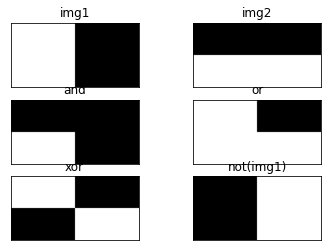

In [2]:
# 비트와이즈 연산 (bitwise.py)

import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 흰색(255), 오른쪽은 검정색(0)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [25]:
# bitwise_and 연산으로 마스킹하기 (bitwise_masking.py) 주요!!

import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/girl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
img[:, :, [3]] = 0
img[:100, :100, [3]] = 100
#print(img.shape)
#print(img[:,:,[3]])

#--② 마스크 만들기
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255,255), -1)

#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)


mask_test1 = cv2.bitwise_or(mask[:,:,[0]], mask[:,:,[1]])
print(mask[:,:,[0]].shape)
print(mask[:,:,[1]].shape)
print(mask[:,:,[2]].shape)
print(mask[:,:,[3]].shape)
print(mask_test1.shape)

# r,g,b 중 하나라도 값이 존재하면 alpha 채널을 255로 변경하는 코드
for i in masked:
    for j in i:
        if (not 0) in j[:3]:
            print(j, "바꿉니다")
            j[3] = 255

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imwrite('img/mask_img.png', img)
cv2.imshow('mask', mask)
cv2.imwrite('img/mask.png', mask)
cv2.imshow('masked', masked)
cv2.imwrite('img/masked.png', masked)
cv2.waitKey()
cv2.destroyAllWindows()

(293, 406, 1)
(293, 406, 1)
(293, 406, 1)
(293, 406, 1)
(293, 406)
[ 1 14  6  0] 바꿉니다
[ 1 11  5  0] 바꿉니다
[ 1 11 11  0] 바꿉니다
[ 1 11 11  0] 바꿉니다


In [77]:
for i in range(5):
    if (not 0) in [0,0,1]:
        print("not 0도 있어!")
    

not 0도 있어!
not 0도 있어!
not 0도 있어!
not 0도 있어!
not 0도 있어!


### 쓰레시 홀딩 기술 복습
#### 전역 스레시홀딩
* ret, out = cv2.threshold(img, threshold, value, type_flag)
    * img: 변환할 이미지
    * threshold: 스레시홀딩 임계값
    * value: 임계값 기준에 만족하는 픽셀에 적용할 값
    * type_flag: 스레시홀딩 적용 방법
* type_flag 값은 다음과 같습니다.
    * cv2.THRESH_BINARY: 픽셀 값이 임계값을 넘으면 value로 지정하고, 넘지 못하면 0으로 지정
    * cv2.THRESH_BINARY_INV: cv.THRESH_BINARY의 반대
    * cv2.THRESH_TRUNC: 픽셀 값이 임계값을 넘으면 value로 지정하고, 넘지 못하면 원래 값 유지
    * cv2.THRESH_TOZERO: 픽셀 값이 임계값을 넘으면 원래 값 유지, 넘지 못하면 0으로 지정
    * cv2.THRESH_TOZERO_INV: cv2.THRESH_TOZERO의 반대
    
#### 적응형 스레시홀딩
* cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)
    * img: 입력영상
    * value: 임계값을 만족하는 픽셀에 적용할 값
    * method: 임계값 결정 방법
    * type_flag: 스레시홀딩 적용 방법 (cv2.threshod()와 동일)
    * block_size: 영역으로 나눌 이웃의 크기(n x n), 홀수
    * C: 계산된 임계값 결과에서 가감할 상수(음수 가능)
* method 값
    * cv2.ADAPTIVE_THRESH_MEAN_C: 이웃 픽셀의 평균으로 결정
    * cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 가우시안 분포에 따른 가중치의 합으로 결정

otsu threshold: 142.0


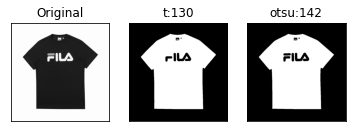

In [5]:
# 오츠의 알고리즘을 적용한 스레시홀딩 (threshold_otsu.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('img/t4.jpg', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY_INV)  # 사람이 130이라는 값       
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력
# 옵션 여러개 줄때는 | 를 쓴다.

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [18]:
# 트랙바로 알파 블렌딩 (blending_alpha_trackbar.py)

import cv2
import numpy as np

win_name = 'Threshold'     # 창 이름
trackbar_name = 'value'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    _, t_130 = cv2.threshold(img, x, 255, cv2.THRESH_BINARY)
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, value)


# ---② 합성 영상 읽기
img = cv2.imread('img/pp4.jpg', cv2.IMREAD_GRAYSCALE) 

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img)
cv2.createTrackbar(trackbar_name, win_name, 0, 255, onChange)

cv2.waitKey()
cv2.destroyAllWindows()



NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

NameError: name 'img1' is not defined

In [19]:
# 적응형 스레시홀딩 적용 (threshold_adapted.py)

import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('img/pp2.jpg', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

cv2.imshow('Original', img)
cv2.imshow('Global-Otsu', th1)
cv2.imshow('Adapted-Mean', th2)
cv2.imshow('Adapted-Gaussian', th3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# 쓰레시홀딩 트랙바로 적용하기 - 이미지 이진화

def do_noting(x):
    pass


import cv2
import numpy as np

cv2.namedWindow('binary')
cv2.createTrackbar('threshold', 'binary', 0, 255, do_noting) 
cv2.setTrackbarPos('threshold', 'binary', 127)

img_color = cv2.imread('img/tt2.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_copy = np.zeros_like(img_color)
flag = cv2.THRESH_BINARY

while True:
    
    value = cv2.getTrackbarPos('threshold', 'binary') 
    _, img_binary = cv2.threshold(img_gray, value, 255, flag) # THRESH_BINARY_INV : 반전된 마스크 이미지
    cv2.imshow('binary', img_binary)
    
    key = cv2.waitKey(1)&0xFF
    if key == 27: # esc 누르면 닫음
        break
    elif key == ord('s'):
        print("저장")
        cv2.destroyWindow('binary')
        cv2.imwrite(img_color[:-3]+"png", img_binary)
        break
    elif key == ord('t'):
        print(img_binary.shape)
        print(img_color.shape)
        if flag == cv2.THRESH_BINARY:
            flag = cv2.THRESH_BINARY_INV
        else:
            flag = cv2.THRESH_BINARY
        

cv2.destroyAllWindows()
cv2.waitKey(0)

(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)
(600, 500)
(600, 500, 3)


-1

In [20]:
# 클릭한 위치의 휴값으로 픽셀값을 읽어와서 마스킹

import cv2 as cv
import numpy as np


hsv = 0
lower_blue1 = 0
upper_blue1 = 0
lower_blue2 = 0
upper_blue2 = 0
lower_blue3 = 0
upper_blue3 = 0


def mouse_callback(event, x, y, flags, param):
    global hsv, lower_blue1, upper_blue1, lower_blue2, upper_blue2, lower_blue3, upper_blue3

    # 마우스 왼쪽 버튼 누를시 위치에 있는 픽셀값을 읽어와서 HSV로 변환 (x, y 값으로 저장)
    if event == cv.EVENT_LBUTTONDOWN:
        print(img_color[y, x])
        color = img_color[y, x]

        one_pixel = np.uint8([[color]])
        hsv = cv.cvtColor(one_pixel, cv.COLOR_BGR2HSV)
        hsv = hsv[0][0]

        # HSV 색공간에서 마우스 클릭으로 얻은 픽셀값과 유사한 픽셀값의 범위를 정함
        if hsv[0] < 10:
            print("case1")
            lower_blue1 = np.array([hsv[0]-10+180, 30, 30]) # 색상만 조절
            upper_blue1 = np.array([180, 255, 255])
            lower_blue2 = np.array([0, 30, 30])
            upper_blue2 = np.array([hsv[0], 255, 255])
            lower_blue3 = np.array([hsv[0], 30, 30])
            upper_blue3 = np.array([hsv[0]+10, 255, 255])
            #     print(i-10+180, 180, 0, i)
            #     print(i, i+10)

        elif hsv[0] > 170:
            print("case2")
            lower_blue1 = np.array([hsv[0], 30, 30])
            upper_blue1 = np.array([180, 255, 255])
            lower_blue2 = np.array([0, 30, 30])
            upper_blue2 = np.array([hsv[0]+10-180, 255, 255])
            lower_blue3 = np.array([hsv[0]-10, 30, 30])
            upper_blue3 = np.array([hsv[0], 255, 255])
            #     print(i, 180, 0, i+10-180)
            #     print(i-10, i)
        else:
            print("case3")
            lower_blue1 = np.array([hsv[0], 30, 30])
            upper_blue1 = np.array([hsv[0]+10, 255, 255])
            lower_blue2 = np.array([hsv[0]-10, 30, 30])
            upper_blue2 = np.array([hsv[0], 255, 255])
            lower_blue3 = np.array([hsv[0]-10, 30, 30])
            upper_blue3 = np.array([hsv[0], 255, 255])
            #     print(i, i+10)
            #     print(i-10, i)

        print(hsv[0])
        print("@1", lower_blue1, "~", upper_blue1)
        print("@2", lower_blue2, "~", upper_blue2)
        print("@3", lower_blue3, "~", upper_blue3)


cv.namedWindow('img_color')
cv.setMouseCallback('img_color', mouse_callback)



while(True):
    img_color = cv.imread('img/s4.jpg')
    height, width = img_color.shape[:2]
    img_color = cv.resize(img_color, (width, height), interpolation=cv.INTER_AREA)

    img_hsv = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)

    img_mask1 = cv.inRange(img_hsv, lower_blue1, upper_blue1)
    img_mask2 = cv.inRange(img_hsv, lower_blue2, upper_blue2)
    img_mask3 = cv.inRange(img_hsv, lower_blue3, upper_blue3)
    img_mask = img_mask1 | img_mask2 | img_mask3

    img_result = cv.bitwise_and(img_color, img_color, mask=img_mask)


    cv.imshow('img_color', img_color)
    cv.imshow('img_mask', img_mask)
    cv.imshow('img_result', img_result)


    if cv.waitKey(1) & 0xFF == 27:
        break


cv.destroyAllWindows()

[86 75 67]
case3
107
@1 [107  30  30] ~ [117 255 255]
@2 [97 30 30] ~ [107 255 255]
@3 [97 30 30] ~ [107 255 255]
[87 76 68]
case3
107
@1 [107  30  30] ~ [117 255 255]
@2 [97 30 30] ~ [107 255 255]
@3 [97 30 30] ~ [107 255 255]
[104  88  71]
case3
105
@1 [105  30  30] ~ [115 255 255]
@2 [95 30 30] ~ [105 255 255]
@3 [95 30 30] ~ [105 255 255]
[101  87  69]
case3
103
@1 [103  30  30] ~ [113 255 255]
@2 [93 30 30] ~ [103 255 255]
@3 [93 30 30] ~ [103 255 255]
[105  91  73]
case3
103
@1 [103  30  30] ~ [113 255 255]
@2 [93 30 30] ~ [103 255 255]
@3 [93 30 30] ~ [103 255 255]
[83 70 54]
case3
103
@1 [103  30  30] ~ [113 255 255]
@2 [93 30 30] ~ [103 255 255]
@3 [93 30 30] ~ [103 255 255]
[105  93  81]
case3
105
@1 [105  30  30] ~ [115 255 255]
@2 [95 30 30] ~ [105 255 255]
@3 [95 30 30] ~ [105 255 255]
[111  97  85]
case3
106
@1 [106  30  30] ~ [116 255 255]
@2 [96 30 30] ~ [106 255 255]
@3 [96 30 30] ~ [106 255 255]
[248 248 236]
case3
90
@1 [90 30 30] ~ [100 255 255]
@2 [80 30 30] ~ [ 90

[234 239 240]
case3
25
@1 [25 30 30] ~ [ 35 255 255]
@2 [15 30 30] ~ [ 25 255 255]
@3 [15 30 30] ~ [ 25 255 255]
[231 235 236]
case3
24
@1 [24 30 30] ~ [ 34 255 255]
@2 [14 30 30] ~ [ 24 255 255]
@3 [14 30 30] ~ [ 24 255 255]
[232 236 237]
case3
24
@1 [24 30 30] ~ [ 34 255 255]
@2 [14 30 30] ~ [ 24 255 255]
@3 [14 30 30] ~ [ 24 255 255]
[223 226 234]
case1
8
@1 [178  30  30] ~ [180 255 255]
@2 [ 0 30 30] ~ [  8 255 255]
@3 [ 8 30 30] ~ [ 18 255 255]
[232 237 236]
case3
36
@1 [36 30 30] ~ [ 46 255 255]
@2 [26 30 30] ~ [ 36 255 255]
@3 [26 30 30] ~ [ 36 255 255]
[ 75 102 136]
case3
13
@1 [13 30 30] ~ [ 23 255 255]
@2 [ 3 30 30] ~ [ 13 255 255]
@3 [ 3 30 30] ~ [ 13 255 255]
[ 80 103 135]
case3
13
@1 [13 30 30] ~ [ 23 255 255]
@2 [ 3 30 30] ~ [ 13 255 255]
@3 [ 3 30 30] ~ [ 13 255 255]
[ 80 103 135]
case3
13
@1 [13 30 30] ~ [ 23 255 255]
@2 [ 3 30 30] ~ [ 13 255 255]
@3 [ 3 30 30] ~ [ 13 255 255]
[95 81 69]
case3
106
@1 [106  30  30] ~ [116 255 255]
@2 [96 30 30] ~ [106 255 255]
@3 [96 30 

### 역투영 기술 복습
* 

In [19]:
# 마우스로 선택한 영역의 물체 분리하기 (histo_backproject.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('img/s4.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    # 비율은 1을 넘어서는 안되기 때문에 1을 넘는 수는 1을 갖게 함
    bp = np.minimum(bp, 1)
    # 1차원 배열을 원래의 shape로 변환
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
 
# OpenCV API로 구현한 함수 ---⑪ 
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    # 빨간 사각형으로 ROI 영역 표시
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()